# Diabetes Prediction - KNN
Whether a person has diabetes or not (768)

### Import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve
import seaborn as sns
sns.set_theme()

### Read in Data

In [2]:
# read in data
df = pd.read_csv('health care diabetes.csv',na_values='NaN')

# columns for eda analysis
eda_columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

# replace 0 values in eda_columns to NaN
for column in eda_columns:
    df[column].replace(0, np.NaN, inplace=True)
    
# create a copy of dataframe
df_copy = df.copy()

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### Data Exploration
A value of zero indicates missing value for Glucose, BloodPressure, SkinThickness, Insulin, BMI

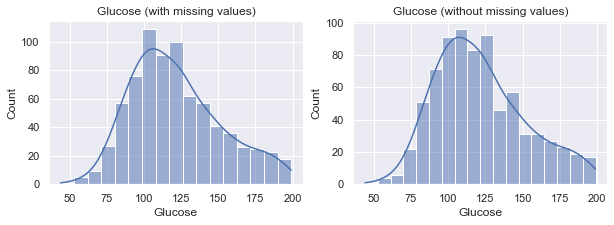

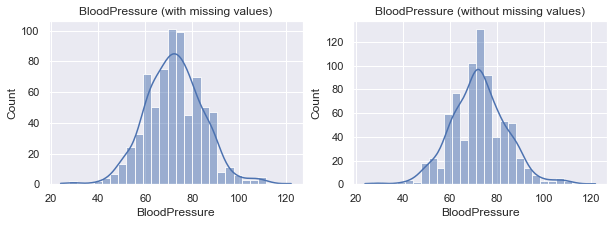

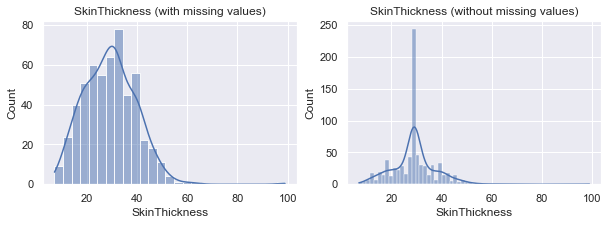

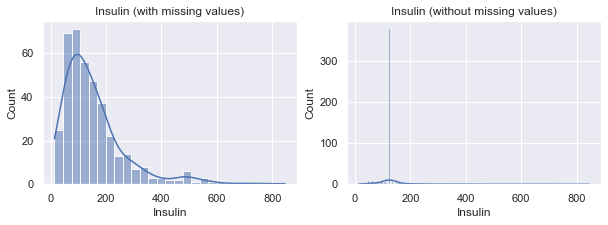

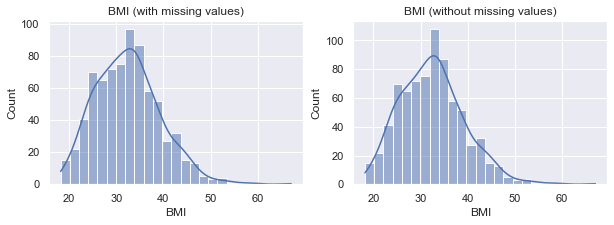

In [3]:
# replace NaN values with mean/median depending on skewness of data
df['Glucose'].fillna(np.nanmedian(df['Glucose']),inplace=True)
df['BloodPressure'].fillna(np.nanmedian(df['BloodPressure']),inplace=True)
df['SkinThickness'].fillna(np.nanmedian(df['SkinThickness']),inplace=True)
df['Insulin'].fillna(np.nanmedian(df['Insulin']),inplace=True)
df['BMI'].fillna(np.nanmean(df['BMI']),inplace=True)

# create function to plot histograms for experimental data analysis
def plot_hist_eda(dataframe1,dataframe2,column_name):
    
    # create subplots for data "with missing values" and data "without missing values"
    fig, axes = plt.subplots(1,2, figsize = (10,3))
    sns.histplot(ax=axes[0],data=df_copy[column_name],kde=True)
    axes[0].set_title(column_name + ' (with missing values)')
    
    sns.histplot(ax=axes[1],data=df[column_name],kde=True)
    axes[1].set_title(column_name + ' (without missing values)')
    plt.show();

# call plot_hist_eda function for all elements of eda_columns
for column_name in eda_columns:
    plot_hist_eda(df_copy, df, column_name)

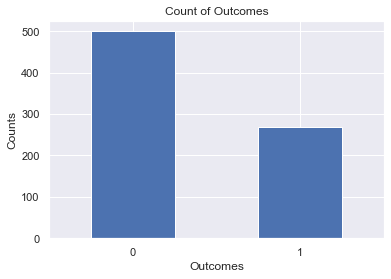

In [4]:
# check for balance of "outcome" variable
df['Outcome'].value_counts().plot(kind='bar',rot=0)
plt.title('Count of Outcomes')
plt.xlabel('Outcomes')
plt.ylabel('Counts');

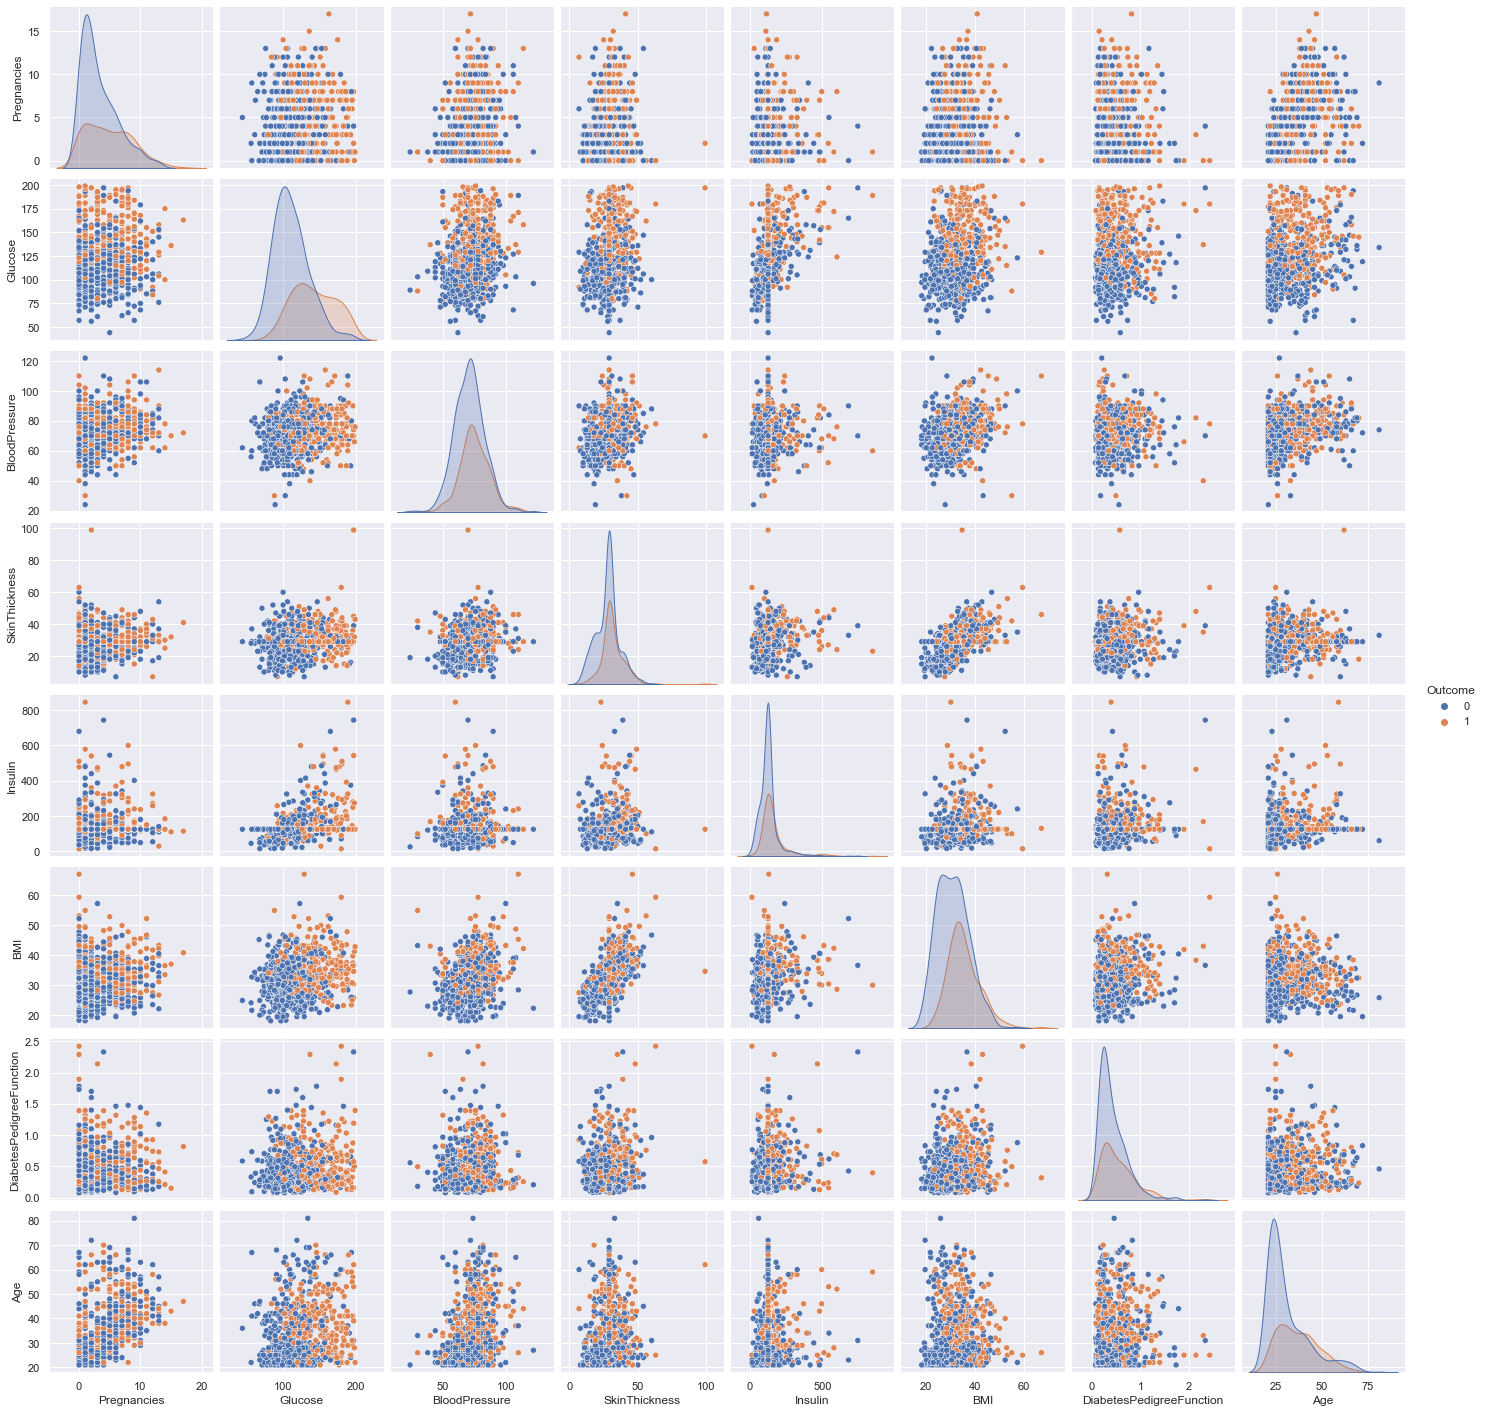

In [5]:
# scatter plots to determine relationship between variables
sns.pairplot(data=df, hue='Outcome');

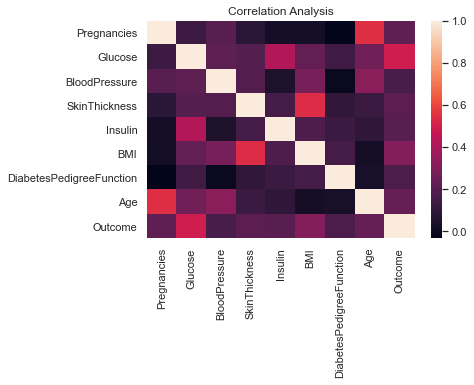

In [6]:
# correlation analysis (heat map)
sns.heatmap(df.corr())
plt.title('Correlation Analysis');

### Data Modeling

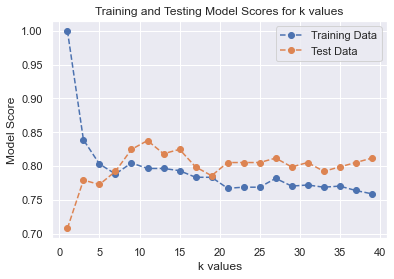

In [7]:
# select X and y values
X = df.drop('Outcome',axis=1)
y = df['Outcome']

# split data into training and testing datasets
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

# standardize data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# find the optimal k value
predictions_train = []
predictions_test = []
k_values = range(1,40,2)
for n in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=n)
    knn_clf.fit(x_train,y_train)
    predictions_train.append(knn_clf.score(x_train,y_train))
    predictions_test.append(knn_clf.score(x_test,y_test))
    
# plot training and test scores against to inspect for optimal k value
plt.plot(k_values,predictions_train,'--',
         marker='o',label='Training Data')
plt.plot(k_values,predictions_test,'--',
         marker='o',label='Test Data')
plt.xlabel('k values')
plt.ylabel('Model Score')
plt.title('Training and Testing Model Scores for k values')
plt.legend()
plt.show()

After a visual inspection of the above chart, the optimal k values are 9 and 11. I will use k=11 for my model.

In [8]:
# creating knn model with optimal k value (k=11)
knn_clf = KNeighborsClassifier(n_neighbors=11)
knn_clf.fit(x_train,y_train)

# classification report on training data performance
ypred_train = knn_clf.predict(x_train)
print(classification_report(y_train,ypred_train))

# ROC curve
roc_curve(y_train,ypred_train)

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       393
           1       0.74      0.66      0.70       221

    accuracy                           0.80       614
   macro avg       0.78      0.77      0.77       614
weighted avg       0.79      0.80      0.79       614



(array([0.        , 0.12722646, 1.        ]),
 array([0.        , 0.66063348, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [9]:
# classification report on test data performance
ypred_test = knn_clf.predict(x_test)
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       107
           1       0.78      0.66      0.71        47

    accuracy                           0.84       154
   macro avg       0.82      0.79      0.80       154
weighted avg       0.83      0.84      0.83       154

